# IABI Final Prject

## Preprocessing

In [3]:
# !pip install pydicom pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached pydicom-3.0.1-py3-none-any.whl.metadata (9.4 kB)
Using cached pydicom-3.0.1-py3-none-any.whl (2.4 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import os
import pydicom
import random
import nibabel as nib
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset_path = './/Dataset/LGG-1p19qDeletion/manifest-1593205468177/'

metadata_path = os.path.join(dataset_path, 'metadata.csv')

metadata_df = pd.read_csv(metadata_path)

metadata_df.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.3344.2526.325093301111...,LGG-1p19qDeletion,NaN,https://doi.org/10.7937/K9/TCIA.2017.dwehtz9v,LGG-104,1.3.6.1.4.1.14519.5.2.1.3344.2526.291265840929...,MRI Hd wow,06-26-2000,Tumor segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,535.79 KB,.\LGG-1p19qDeletion\LGG-104\06-26-2000-NA-MRI ...,2024-05-06T14:46:32.72
1,1.3.6.1.4.1.14519.5.2.1.3344.2526.111842483360...,LGG-1p19qDeletion,NaN,https://doi.org/10.7937/K9/TCIA.2017.dwehtz9v,LGG-203,1.3.6.1.4.1.14519.5.2.1.3344.2526.872736028443...,MRI Hd wow,08-06-1997,Tumor segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,429.07 KB,.\LGG-1p19qDeletion\LGG-203\08-06-1997-NA-MRI ...,2024-05-06T14:46:36.095
2,1.3.6.1.4.1.14519.5.2.1.3344.2526.641668975271...,LGG-1p19qDeletion,NaN,https://doi.org/10.7937/K9/TCIA.2017.dwehtz9v,LGG-104,1.3.6.1.4.1.14519.5.2.1.3344.2526.291265840929...,MRI Hd wow,06-26-2000,Gad Ax SPGR Straight,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,60,8.04 MB,.\LGG-1p19qDeletion\LGG-104\06-26-2000-NA-MRI ...,2024-05-06T14:46:45.329
3,1.3.6.1.4.1.14519.5.2.1.3344.2526.172741528794...,LGG-1p19qDeletion,NaN,https://doi.org/10.7937/K9/TCIA.2017.dwehtz9v,LGG-203,1.3.6.1.4.1.14519.5.2.1.3344.2526.872736028443...,MRI Hd wow,08-06-1997,Post Gad axial FSE,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,48,6.43 MB,.\LGG-1p19qDeletion\LGG-203\08-06-1997-NA-MRI ...,2024-05-06T14:46:49.47
4,1.3.6.1.4.1.14519.5.2.1.3344.2526.103340886923...,LGG-1p19qDeletion,NaN,https://doi.org/10.7937/K9/TCIA.2017.dwehtz9v,LGG-210,1.3.6.1.4.1.14519.5.2.1.3344.2526.334842629201...,MRI Hd wow,12-21-1989,axial T1 GAD,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,20,2.68 MB,.\LGG-1p19qDeletion\LGG-210\12-21-1989-NA-MRI ...,2024-05-06T14:47:00.579


In [7]:
patient_dirs = glob(os.path.join(dataset_path, 'LGG-1p19qDeletion', 'LGG-*'))

patient_dirs[:5]

['.//Dataset/LGG-1p19qDeletion/manifest-1593205468177/LGG-1p19qDeletion\\LGG-104',
 './/Dataset/LGG-1p19qDeletion/manifest-1593205468177/LGG-1p19qDeletion\\LGG-203',
 './/Dataset/LGG-1p19qDeletion/manifest-1593205468177/LGG-1p19qDeletion\\LGG-210',
 './/Dataset/LGG-1p19qDeletion/manifest-1593205468177/LGG-1p19qDeletion\\LGG-216',
 './/Dataset/LGG-1p19qDeletion/manifest-1593205468177/LGG-1p19qDeletion\\LGG-218']

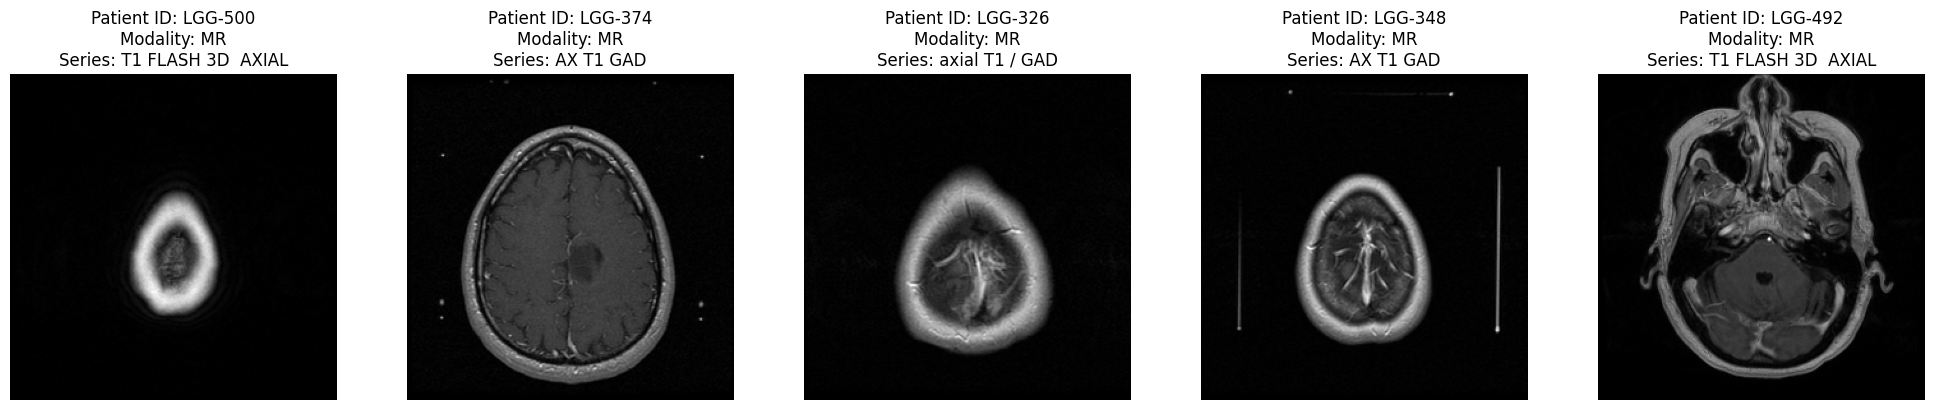

In [8]:
all_dicom_files = glob(os.path.join(dataset_path, 'LGG-1p19qDeletion', 'LGG-*', '**', '*.dcm'), recursive=True)

t1_dicom_files = [file for file in all_dicom_files if 't1' in file.lower()]

random_files = random.sample(t1_dicom_files, 5)

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, file_path in enumerate(random_files):
    dicom_data = pydicom.dcmread(file_path)
    image_slice = dicom_data.pixel_array

    patient_id = dicom_data.PatientID
    modality = dicom_data.Modality
    series_description = dicom_data.SeriesDescription if 'SeriesDescription' in dicom_data else "N/A"

    title = f"Patient ID: {patient_id}\nModality: {modality}\nSeries: {series_description}"

    axes[i].imshow(image_slice, cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [9]:
dicom_info = []

for dicom_path in all_dicom_files:
    dicom_data = pydicom.dcmread(dicom_path)
    dicom_info.append({
        'PatientID': dicom_data.PatientID,
        'Modality': dicom_data.Modality,
        'ImageShape': dicom_data.pixel_array.shape,
        'FilePath': dicom_path
    })

dicom_df = pd.DataFrame(dicom_info)

dicom_df.head()

,PatientID,Modality,ImageShape,FilePath
0,LGG-104,SEG,"(60, 256, 256)",.//Dataset/LGG-1p19qDeletion/manifest-15932054...
1,LGG-104,MR,"(512, 512)",.//Dataset/LGG-1p19qDeletion/manifest-15932054...
2,LGG-104,MR,"(512, 512)",.//Dataset/LGG-1p19qDeletion/manifest-15932054...
3,LGG-104,MR,"(512, 512)",.//Dataset/LGG-1p19qDeletion/manifest-15932054...
4,LGG-104,MR,"(512, 512)",.//Dataset/LGG-1p19qDeletion/manifest-15932054...


In [10]:
dicom_df.to_csv('dicom_metadata.csv', index=False)
len(dicom_df)

17519

### Convert DICOM files to NIFTI format

In [11]:
def dicom_to_nifti_merged_df(dicom_df, output_dir):
    """
    Converts DICOM files listed in the DataFrame to merged NIfTI format,
    including PatientID in the filename.

    Args:
        dicom_df: DataFrame with 'PatientID', 'Modality', 'FilePath' columns.
        output_dir: Directory where NIfTI files will be saved.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Group DICOM files by parent directory
    for directory, group_data in dicom_df.groupby(dicom_df['FilePath'].apply(os.path.dirname)):
        try:
            # Extract file paths and ensure they're sorted
            file_paths = group_data['FilePath'].tolist()
            file_paths.sort(key=lambda x: int(pydicom.dcmread(x).InstanceNumber))

            # Read and stack image data
            image_data_list = [pydicom.dcmread(f).pixel_array for f in file_paths]
            image_3d = np.stack(image_data_list, axis=-1)

            # Get PatientID (assuming it's the same for all files in the group)
            patient_id = group_data['PatientID'].iloc[0]

            # Create and save NIfTI image with PatientID in the filename
            nifti_image = nib.Nifti1Image(image_3d, affine=np.eye(4))
            nifti_filename = f"{patient_id}_{os.path.basename(directory)}.nii.gz"
            nifti_path = os.path.join(output_dir, nifti_filename)
            nib.save(nifti_image, nifti_path)
            print(f"Merged DICOM files from {directory} to {nifti_path}")

        except Exception as e:
            print(f"Error processing {directory}: {e}")

In [12]:
output_dir = './converted_nifti'

dicom_to_nifti_merged_df(dicom_df, output_dir)

Merged DICOM files from .//Dataset/LGG-1p19qDeletion/manifest-1593205468177/LGG-1p19qDeletion\LGG-104\06-26-2000-NA-MRI Hd wow-05523\300.000000-Tumor segmentation-72729 to ./converted_nifti\LGG-104_300.000000-Tumor segmentation-72729.nii.gz
Merged DICOM files from .//Dataset/LGG-1p19qDeletion/manifest-1593205468177/LGG-1p19qDeletion\LGG-104\06-26-2000-NA-MRI Hd wow-05523\4.000000-Gad Ax T2 Straight-38151 to ./converted_nifti\LGG-104_4.000000-Gad Ax T2 Straight-38151.nii.gz
Merged DICOM files from .//Dataset/LGG-1p19qDeletion/manifest-1593205468177/LGG-1p19qDeletion\LGG-104\06-26-2000-NA-MRI Hd wow-05523\5.000000-Gad Ax SPGR Straight-62002 to ./converted_nifti\LGG-104_5.000000-Gad Ax SPGR Straight-62002.nii.gz
Merged DICOM files from .//Dataset/LGG-1p19qDeletion/manifest-1593205468177/LGG-1p19qDeletion\LGG-203\08-06-1997-NA-MRI Hd wow-40871\300.000000-Tumor segmentation-75999 to ./converted_nifti\LGG-203_300.000000-Tumor segmentation-75999.nii.gz
Merged DICOM files from .//Dataset/LGG-1

### Re-orient to LPS/RAI

In [13]:
def reorient_to_LPS_RAI(nifti_path, output_path):
    """Reorients a NIfTI image to LPS/RAI orientation.

    Args:
        nifti_path: Path to the input NIfTI file.
        output_path: Path to save the reoriented NIfTI file.
    """
    try:
        img = nib.load(nifti_path)
        img_data = img.get_fdata()
        affine = img.affine

        # Define the target orientation (LPS/RAI)
        target_orientation = nib.aff2axcodes(affine)

        #Check if the image is already in LPS/RAI
        if target_orientation == ('L', 'P', 'S'):
            print(f"Image {nifti_path} is already in LPS orientation. Skipping reorientation.")
            #Copy the file to output directory without reorientation
            import shutil
            shutil.copyfile(nifti_path,output_path)
            return

        # Reorient the image
        reoriented_img = nib.as_closest_canonical(img)

        # Save the reoriented image
        nib.save(reoriented_img, output_path)
        print(f"Reoriented {nifti_path} to {output_path}")

    except Exception as e:
        print(f"Error reorienting {nifti_path}: {e}")

In [14]:
nifti_dir = './converted_nifti'
reoriented_nifti_dir = './reoriented_nifti'

os.makedirs(reoriented_nifti_dir, exist_ok=True)

for filename in os.listdir(nifti_dir):
    if filename.endswith('.nii.gz'):
      nifti_filepath = os.path.join(nifti_dir, filename)
      reoriented_nifti_filepath = os.path.join(reoriented_nifti_dir, filename)
      reorient_to_LPS_RAI(nifti_filepath,reoriented_nifti_filepath)

Reoriented ./converted_nifti\LGG-104_300.000000-Tumor segmentation-72729.nii.gz to ./reoriented_nifti\LGG-104_300.000000-Tumor segmentation-72729.nii.gz
Reoriented ./converted_nifti\LGG-104_4.000000-Gad Ax T2 Straight-38151.nii.gz to ./reoriented_nifti\LGG-104_4.000000-Gad Ax T2 Straight-38151.nii.gz
Reoriented ./converted_nifti\LGG-104_5.000000-Gad Ax SPGR Straight-62002.nii.gz to ./reoriented_nifti\LGG-104_5.000000-Gad Ax SPGR Straight-62002.nii.gz
Reoriented ./converted_nifti\LGG-203_300.000000-Tumor segmentation-75999.nii.gz to ./reoriented_nifti\LGG-203_300.000000-Tumor segmentation-75999.nii.gz
Reoriented ./converted_nifti\LGG-203_4.000000-Post Gad axial FSE-00285.nii.gz to ./reoriented_nifti\LGG-203_4.000000-Post Gad axial FSE-00285.nii.gz
Reoriented ./converted_nifti\LGG-203_5.000000-Post Gad AX. SPGR-14065.nii.gz to ./reoriented_nifti\LGG-203_5.000000-Post Gad AX. SPGR-14065.nii.gz
Reoriented ./converted_nifti\LGG-210_3.000000-AX T2 OBL-21631.nii.gz to ./reoriented_nifti\LGG-2

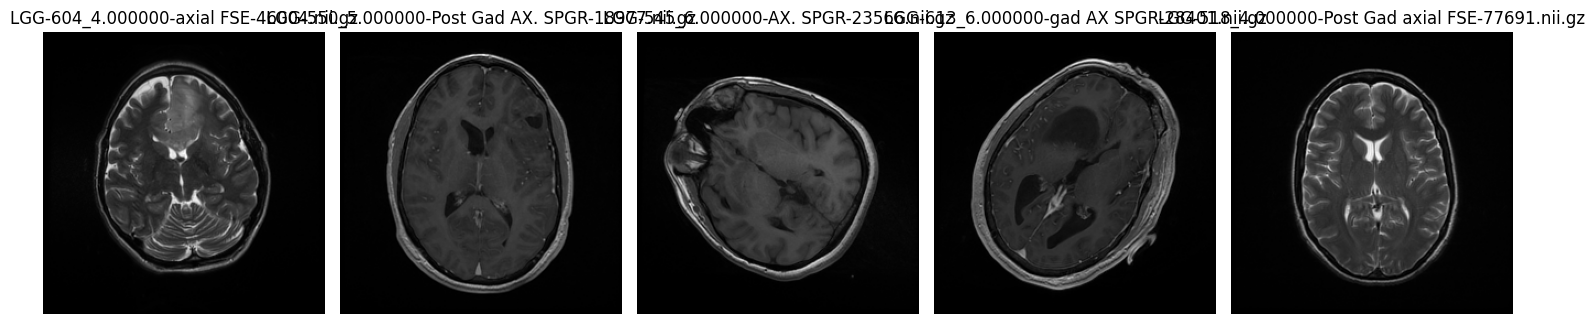

In [20]:
registered_nifti_dir = './reoriented_nifti'

nifti_files = [f for f in os.listdir(registered_nifti_dir) if f.endswith('.nii.gz')]

num_images_to_display = min(5, len(nifti_files))
images_to_display = random.sample(nifti_files, num_images_to_display)

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))


for i, filename in enumerate(images_to_display):
  try:
    img_path = os.path.join(registered_nifti_dir, filename)
    img = nib.load(img_path)
    img_data = img.get_fdata()

    slice_index = img_data.shape[2] // 2
    axes[i].imshow(img_data[:, :, slice_index], cmap='gray')
    axes[i].set_title(filename)
    axes[i].axis('off')
  except Exception as e:
    print(f"Error displaying {filename}: {e}")

plt.tight_layout()
plt.show()

### Register to SRI24 Atlas

In [ ]:
# from google.colab import drive
# drive.mount('./drive')

# !mkdir -p "./drive/My Drive/reoriented_nifti"
# !cp -r ./reoriented_nifti/* "./drive/My Drive/reoriented_nifti/"

Mounted at /content/drive


In [ ]:
%cd ./

/content


In [ ]:
import shutil
from google.colab import drive
drive.mount('./drive')

!mkdir -p ./reoriented_nifti
!cp -r ./drive/My\ Drive/reoriented_nifti/* ./reoriented_nifti/

Mounted at /content/drive


In [ ]:
!wget https://www.nitrc.org/frs/download.php/4499/sri24_anatomy_nifti.zip

--2024-12-23 06:57:07--  https://www.nitrc.org/frs/download.php/4499/sri24_anatomy_nifti.zip
Resolving www.nitrc.org (www.nitrc.org)... 52.3.190.103
Connecting to www.nitrc.org (www.nitrc.org)|52.3.190.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6522201 (6.2M) [application/force-download]
Saving to: ‘sri24_anatomy_nifti.zip’

sri24_anatomy_nifti 100%[===================>]   6.22M  10.3MB/s    in 0.6s    

2024-12-23 06:57:08 (10.3 MB/s) - ‘sri24_anatomy_nifti.zip’ saved [6522201/6522201]



In [ ]:
!unzip ./sri24_anatomy_nifti.zip

Archive:  /content/sri24_anatomy_nifti.zip
   creating: sri24/
  inflating: sri24/late.nii          
  inflating: sri24/spgr.nii          
  inflating: sri24/LICENSE           
  inflating: sri24/erly.nii          


In [ ]:
!pip install antspyx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 55.4 MB/s eta 0:00:00


In [ ]:
import ants
import os
from tqdm import tqdm
from google.colab import drive

# Mount Google Drive
drive.mount('./drive')

# Paths to SRI files
sri24_late_path = "./sri24/late.nii"
sri24_spgr_path = "./sri24/spgr.nii"
sri24_erly_path = "./sri24/erly.nii"

reoriented_nifti_dir = './reoriented_nifti'
registered_nifti_dir = './drive/My Drive/registered_nifti'  # Google Drive path

os.makedirs(registered_nifti_dir, exist_ok=True)

# Get list of already processed files in Google Drive
processed_files = [f for f in os.listdir(registered_nifti_dir) if f.startswith("registered_") and f.endswith(".nii.gz")]

for filename in tqdm(os.listdir(reoriented_nifti_dir)):
    if filename.endswith('.nii.gz'):
        # Check if file has already been processed
        if f"registered_{filename}" in processed_files:
            print(f"Skipping {filename} - already processed.")
            continue  # Skip to the next file

        try:
            # 1. N4 Bias Field Correction (remains the same)
            reoriented_image_path = os.path.join(reoriented_nifti_dir, filename)
            fixed_image = ants.image_read(reoriented_image_path)
            corrected_image = ants.n4_bias_field_correction(fixed_image, shrink_factor=4)

            # 2. & 3. Registration (Modified)
            sri24_template_path = sri24_late_path

            mytx = ants.registration(fixed=ants.image_read(sri24_template_path), moving=corrected_image, type_of_transform='Rigid')
            registered_image = ants.apply_transforms(fixed=ants.image_read(sri24_template_path), moving=corrected_image, transformlist=mytx['fwdtransforms'])

            registered_image_path = os.path.join(registered_nifti_dir, f"registered_{filename}")
            ants.image_write(registered_image, registered_image_path)
            print(f"Registered and saved to Drive: {registered_image_path}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  0%|          | 0/478 [00:00<?, ?it/s]

Skipping LGG-280_3.000000-AX. SPGRGAD-45825.nii.gz - already processed.
Skipping LGG-658_3.000000-Ax T2 FS GAD-63730.nii.gz - already processed.
Skipping LGG-520_4.000000-Post Gad axial FSE-26237.nii.gz - already processed.
Skipping LGG-350_3.000000-AX. SPGRGAD-91790.nii.gz - already processed.
Skipping LGG-307_4.000000-Post Gad axial FSE-70458.nii.gz - already processed.
Skipping LGG-354_3.000000-AX. SPGRGAD-79834.nii.gz - already processed.
Skipping LGG-307_300.000000-Tumor segmentation-05139.nii.gz - already processed.
Skipping LGG-660_300.000000-Tumor segmentation-06448.nii.gz - already processed.
Skipping LGG-659_300.000000-Tumor segmentation-81781.nii.gz - already processed.
Skipping LGG-639_4.000000-Ax T2 FSE gad-46390.nii.gz - already processed.
Skipping LGG-337_3.000000-AX. SPGRGAD-31593.nii.gz - already processed.
Skipping LGG-527_300.000000-Tumor segmentation-14960.nii.gz - already processed.
Skipping LGG-647_300.000000-Tumor segmentation-27747.nii.gz - already processed.
Sk

 86%|████████▌ | 410/478 [01:40<00:16,  4.10it/s]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-345_5.000000-Post Gad AX. SPGR-07582.nii.gz


 86%|████████▌ | 411/478 [02:18<00:25,  2.67it/s]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-579_300.000000-Tumor segmentation-45657.nii.gz


 86%|████████▌ | 412/478 [04:54<01:15,  1.15s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-515_8.000000-Post Gad Ax Obl FSE T2-23661.nii.gz


 86%|████████▋ | 413/478 [06:25<01:55,  1.78s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-355_7.000000-Post Gd AX. SPGR-94871.nii.gz


 87%|████████▋ | 414/478 [07:52<02:47,  2.62s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-359_3.000000-AX FSE-52520.nii.gz


 87%|████████▋ | 415/478 [08:27<03:13,  3.07s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-589_300.000000-Tumor segmentation-98901.nii.gz


 87%|████████▋ | 416/478 [09:52<04:50,  4.68s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-241_4.000000-Post Gad axial FSE-99252.nii.gz


 87%|████████▋ | 417/478 [10:56<06:23,  6.28s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-297_2.000000-AX T2 OBL-45561.nii.gz


 87%|████████▋ | 418/478 [12:23<09:16,  9.27s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-286_3.000000-AX. SPGRGAD-85252.nii.gz


 88%|████████▊ | 419/478 [13:39<12:27, 12.67s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-203_4.000000-Post Gad axial FSE-00285.nii.gz


 88%|████████▊ | 420/478 [14:20<14:06, 14.59s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-395_300.000000-Tumor segmentation-01114.nii.gz


 88%|████████▊ | 421/478 [15:07<16:32, 17.42s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-298_300.000000-Tumor segmentation-32831.nii.gz


 88%|████████▊ | 422/478 [18:57<38:25, 41.17s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-306_4.000000-Ax T2 FSE POST GAD-92655.nii.gz


 88%|████████▊ | 423/478 [20:16<42:31, 46.40s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-395_3.000000-TSE T2 RST AXIAL-16865.nii.gz


 89%|████████▊ | 424/478 [21:02<41:39, 46.28s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-371_300.000000-Tumor segmentation-86830.nii.gz


 89%|████████▉ | 425/478 [22:24<46:50, 53.03s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-327_2.000000-AX FSE-55145.nii.gz


 89%|████████▉ | 426/478 [23:03<43:23, 50.06s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-642_300.000000-Tumor segmentation-45335.nii.gz


 89%|████████▉ | 427/478 [24:30<49:52, 58.68s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-295_4.000000-t1fl3dtraGREGAD-74226.nii.gz


 90%|████████▉ | 428/478 [25:15<46:00, 55.20s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-561_300.000000-Tumor segmentation-76750.nii.gz


 90%|████████▉ | 429/478 [25:58<42:38, 52.22s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-576_300.000000-Tumor segmentation-90581.nii.gz


 90%|████████▉ | 430/478 [27:34<51:12, 64.00s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-313_4.000000-AX. SPGRGAD-00370.nii.gz


 90%|█████████ | 431/478 [29:00<55:05, 70.32s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-516_5.000000-Post Gad AX. SPGR-66775.nii.gz


 90%|█████████ | 432/478 [29:43<47:53, 62.46s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-333_300.000000-Tumor segmentation-91084.nii.gz


 91%|█████████ | 433/478 [30:47<47:10, 62.89s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-314_5.000000-Ax Obl FSEgad-15907.nii.gz


 91%|█████████ | 434/478 [32:07<49:51, 68.00s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-348_3.000000-AX FSE-53183.nii.gz


 91%|█████████ | 435/478 [32:49<43:03, 60.07s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-383_300.000000-Tumor segmentation-20496.nii.gz


 91%|█████████ | 436/478 [33:40<40:13, 57.46s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-240_7.000000-axial T1  GAD-83855.nii.gz


 91%|█████████▏| 437/478 [34:25<36:49, 53.89s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-550_300.000000-Tumor segmentation-08059.nii.gz


 92%|█████████▏| 438/478 [35:48<41:45, 62.63s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-285_3.000000-AX. SPGRGAD-30076.nii.gz


 92%|█████████▏| 439/478 [37:15<45:18, 69.71s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-630_3.000000-t2fseAX-81005.nii.gz


 92%|█████████▏| 440/478 [38:45<47:59, 75.78s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-352_3.000000-Post Gd AX. SPGR-27028.nii.gz


 92%|█████████▏| 441/478 [39:26<40:15, 65.28s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-518_300.000000-Tumor segmentation-12931.nii.gz


 92%|█████████▏| 442/478 [40:42<41:09, 68.59s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-344_5.000000-AX T1 GAD-33538.nii.gz


 93%|█████████▎| 443/478 [41:15<33:44, 57.85s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-359_300.000000-Tumor segmentation-84928.nii.gz


 93%|█████████▎| 444/478 [42:36<36:51, 65.03s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-374_6.000000-AX T1 GAD-86308.nii.gz


 93%|█████████▎| 445/478 [44:05<39:35, 71.99s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-614_5.000000-Post Gad AX. SPGR-77813.nii.gz


 93%|█████████▎| 446/478 [44:42<32:52, 61.63s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-594_300.000000-Tumor segmentation-88881.nii.gz


 94%|█████████▎| 447/478 [45:28<29:19, 56.77s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-325_6.000000-axial T1  GAD-68672.nii.gz


 94%|█████████▎| 448/478 [45:56<24:12, 48.41s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-219_300.000000-Tumor segmentation-55523.nii.gz


 94%|█████████▍| 449/478 [47:29<29:48, 61.66s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-597_4.000000-Post Gad axial FSE-38240.nii.gz


 94%|█████████▍| 450/478 [48:18<26:57, 57.79s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-282_300.000000-Tumor segmentation-19191.nii.gz


 94%|█████████▍| 451/478 [49:00<23:52, 53.07s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-263_300.000000-Tumor segmentation-85816.nii.gz


 95%|█████████▍| 452/478 [49:32<20:19, 46.90s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-574_300.000000-Tumor segmentation-90554.nii.gz


 95%|█████████▍| 453/478 [50:59<24:29, 58.79s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-350_2.000000-axial FSE-50324.nii.gz


 95%|█████████▍| 454/478 [52:31<27:33, 68.90s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-576_5.000000-Post Gad AX. SPGR-96866.nii.gz


 95%|█████████▌| 455/478 [53:09<22:51, 59.63s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-225_300.000000-Tumor segmentation-04246.nii.gz


 95%|█████████▌| 456/478 [54:35<24:40, 67.30s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-295_3.000000-t2fseAXGAD-74772.nii.gz


 96%|█████████▌| 457/478 [56:59<31:41, 90.55s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-326_2.000000-Ax Obl FSE-49264.nii.gz


 96%|█████████▌| 458/478 [57:38<24:57, 74.86s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-570_300.000000-Tumor segmentation-29646.nii.gz


 96%|█████████▌| 459/478 [58:29<21:30, 67.90s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-533_300.000000-Tumor segmentation-65584.nii.gz


 96%|█████████▌| 460/478 [59:07<17:41, 58.95s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-223_300.000000-Tumor segmentation-31089.nii.gz


 96%|█████████▋| 461/478 [1:00:34<19:06, 67.41s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-500_4.000000-T1 FLASH 3D  AXIAL-48410.nii.gz


 97%|█████████▋| 462/478 [1:02:01<19:32, 73.26s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-582_5.000000-axial FSE gad-93180.nii.gz


 97%|█████████▋| 463/478 [1:03:08<17:47, 71.16s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-515_11.000000-Axial T1 SE GAD-88201.nii.gz


 97%|█████████▋| 464/478 [1:03:52<14:45, 63.22s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-563_300.000000-Tumor segmentation-25544.nii.gz


 97%|█████████▋| 465/478 [1:05:25<15:35, 71.97s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-506_5.000000-Post Gad AX. SPGR-90189.nii.gz


 97%|█████████▋| 466/478 [1:06:51<15:13, 76.14s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-305_5.000000-Post Gad AX. SPGR-65331.nii.gz


 98%|█████████▊| 467/478 [1:07:30<11:56, 65.14s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-375_300.000000-Tumor segmentation-91237.nii.gz


 98%|█████████▊| 468/478 [1:08:17<09:55, 59.56s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-766_300.000000-Tumor segmentation-28099.nii.gz


 98%|█████████▊| 469/478 [1:09:37<09:51, 65.71s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-233_2.000000-axial FSE-36586.nii.gz


 98%|█████████▊| 470/478 [1:11:01<09:31, 71.43s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-547_4.000000-Ax T2 FSE gad-45631.nii.gz


 99%|█████████▊| 471/478 [1:12:27<08:49, 75.71s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-231_5.000000-Post Gad AX. SPGR-88822.nii.gz


 99%|█████████▊| 472/478 [1:13:57<07:59, 79.84s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-651_6.000000-AX. SPGR-28031.nii.gz


 99%|█████████▉| 473/478 [1:15:25<06:52, 82.47s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-254_4.000000-Post Gd AX. SPGR-21011.nii.gz


 99%|█████████▉| 474/478 [1:16:08<04:41, 70.45s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-350_300.000000-Tumor segmentation-68262.nii.gz


 99%|█████████▉| 475/478 [1:17:28<03:40, 73.53s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-363_3.000000-AX FSE-10130.nii.gz


100%|█████████▉| 476/478 [1:18:06<02:05, 62.90s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-537_300.000000-Tumor segmentation-08302.nii.gz


100%|█████████▉| 477/478 [1:19:36<01:10, 70.96s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-587_6.000000-AX. SPGR-94988.nii.gz


100%|██████████| 478/478 [1:23:30<00:00, 10.48s/it] 

Registered and saved to Drive: /content/drive/My Drive/registered_nifti/registered_LGG-625_5.000000-AXIAL BRAVO ARC POST GAD-65255.nii.gz


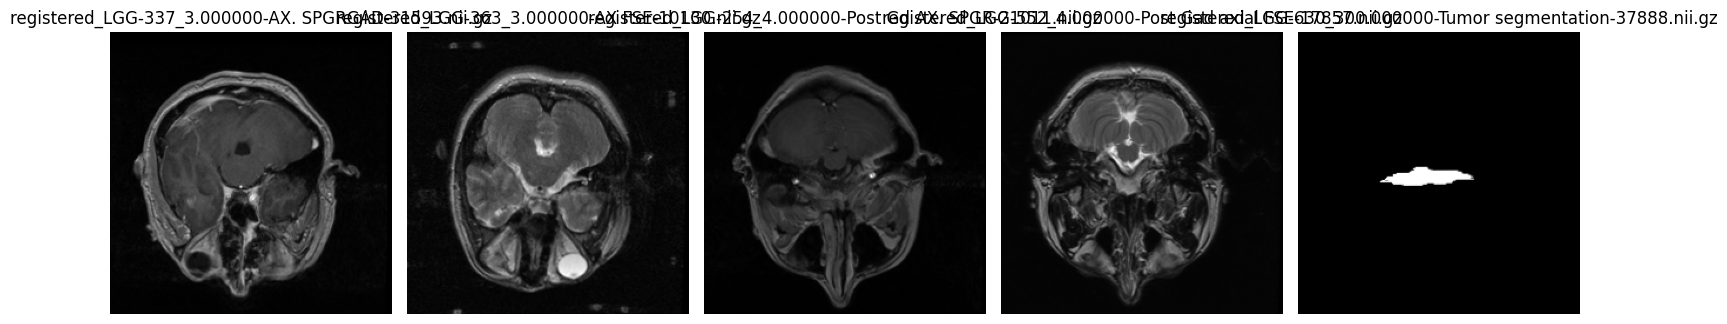

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random

registered_nifti_dir = './drive/My Drive/registered_nifti'

nifti_files = [f for f in os.listdir(registered_nifti_dir) if f.endswith('.nii.gz')]

num_images_to_display = min(5, len(nifti_files))
images_to_display = random.sample(nifti_files, num_images_to_display)

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))


for i, filename in enumerate(images_to_display):
  try:
    img_path = os.path.join(registered_nifti_dir, filename)
    img = nib.load(img_path)
    img_data = img.get_fdata()

    slice_index = img_data.shape[2] // 2
    axes[i].imshow(img_data[:, :, slice_index], cmap='gray')
    axes[i].set_title(filename)
    axes[i].axis('off')
  except Exception as e:
    print(f"Error displaying {filename}: {e}")

plt.tight_layout()
plt.show()

### Register with Synthmorph pretrained model for brain

In [ ]:
!pip install tensorflow==2.16.1

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
!pip install voxelmorph

In [ ]:
!pip install tf-keras
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
import voxelmorph as vxm

ImportError: cannot import name 'mean_squared_error' from 'tensorflow.keras.losses' (/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/losses/__init__.py)

In [ ]:
!pip check

ipython 7.34.0 requires jedi, which is not installed.
pygobject 3.42.1 requires pycairo, which is not installed.


In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.16.0.35.48
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.29.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.1
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.88
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.31.2
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy=

In [ ]:
!git clone https://github.com/voxelmorph/voxelmorph.git

Cloning into 'voxelmorph'...
remote: Enumerating objects: 3442, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 3442 (delta 63), reused 49 (delta 44), pack-reused 3352 (from 4)
Receiving objects: 100% (3442/3442), 129.40 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (2196/2196), done.


In [ ]:
%cd /content/voxelmorph/

/content/voxelmorph


In [ ]:
!wget https://surfer.nmr.mgh.harvard.edu/ftp/data/voxelmorph/synthmorph/brains-dice-vel-0.5-res-16-256f.h5 -O synthmorph_model.h5

--2024-12-23 06:57:45--  https://surfer.nmr.mgh.harvard.edu/ftp/data/voxelmorph/synthmorph/brains-dice-vel-0.5-res-16-256f.h5
Resolving surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)... 132.183.1.43
Connecting to surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)|132.183.1.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85150080 (81M)
Saving to: ‘synthmorph_model.h5’

synthmorph_model.h5 100%[===================>]  81.21M  23.6MB/s    in 3.8s    

2024-12-23 06:57:50 (21.5 MB/s) - ‘synthmorph_model.h5’ saved [85150080/85150080]



In [ ]:
%cd /content/

/content


In [ ]:
import os
from tqdm import tqdm

# Paths to SRI files
sri24_late_path = "./sri24/late.nii"
sri24_spgr_path = "./sri24/spgr.nii"
sri24_erly_path = "./sri24/erly.nii"

reoriented_nifti_dir = './reoriented_nifti'
registered_nifti_dir = './drive/My Drive/registered_nifti_synthmorph'

os.makedirs(registered_nifti_dir, exist_ok=True)

# Get list of already processed files in Google Drive
processed_files = [f for f in os.listdir(registered_nifti_dir) if f.startswith("registered_") and f.endswith(".nii.gz")]

for filename in tqdm(os.listdir(reoriented_nifti_dir)):
    if filename.endswith('.nii.gz'):
        # Check if file has already been processed
        if f"registered_{filename}" in processed_files:
            print(f"Skipping {filename} - already processed.")
            continue  # Skip to the next file

        try:
            # Prepare paths for moving and fixed images
            moving_image_path = os.path.join(reoriented_nifti_dir, filename)
            fixed_image_path = sri24_late_path
            output_image_path = os.path.join(registered_nifti_dir, f"registered_{filename}")

            # Run VoxelMorph registration script using the SynthMorph model
            !python voxelmorph/scripts/tf/register.py --moving {moving_image_path} --fixed {fixed_image_path} --moved {output_image_path} --model content/voxelmorph/synthmorph_model.h5 --gpu 1

            print(f"Registered and saved to Drive: {output_image_path}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")


  0%|          | 0/478 [00:00<?, ?it/s]

2024-12-23 07:41:27.337887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 07:41:27.358146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 07:41:27.364236: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 07:41:27.379085: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-23 07:41:28.713572: W tensorflow/comp

  0%|          | 1/478 [00:05<43:55,  5.53s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti_synthmorph/registered_LGG-601_6.000000-AX. SPGR-84115.nii.gz
2024-12-23 07:41:32.852116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 07:41:32.872871: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 07:41:32.880406: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 07:41:32.896112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AV

  0%|          | 2/478 [00:09<38:13,  4.82s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti_synthmorph/registered_LGG-288_2.000000-AX T2 OBL-52608.nii.gz
2024-12-23 07:41:37.132527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 07:41:37.153319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 07:41:37.161508: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 07:41:37.177049: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 A

  1%|          | 3/478 [00:13<34:46,  4.39s/it]

^C
Registered and saved to Drive: /content/drive/My Drive/registered_nifti_synthmorph/registered_LGG-591_6.000000-AX. SPGR-53232.nii.gz
2024-12-23 07:41:41.037070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 07:41:41.056857: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 07:41:41.062883: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 07:41:41.077537: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2

  1%|          | 4/478 [00:19<37:37,  4.76s/it]

Registered and saved to Drive: /content/drive/My Drive/registered_nifti_synthmorph/registered_LGG-220_2.000000-axial FSE-06180.nii.gz


  1%|          | 5/478 [00:20<27:48,  3.53s/it]

^C
Registered and saved to Drive: /content/drive/My Drive/registered_nifti_synthmorph/registered_LGG-610_4.000000-axial FSE-12493.nii.gz
2024-12-23 07:41:47.689919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 07:41:47.709559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 07:41:47.715510: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 07:41:47.731919: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX

  1%|▏         | 6/478 [00:22<22:43,  2.89s/it]

^C
Registered and saved to Drive: /content/drive/My Drive/registered_nifti_synthmorph/registered_LGG-327_4.000000-AX T1 GAD-64446.nii.gz
2024-12-23 07:41:49.330988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 07:41:49.351306: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 07:41:49.357288: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 07:41:49.372724: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX

In [ ]:
%cd /content/

/content


### Brain Extraction and Skull Stripping


In [ ]:
import shutil
from google.colab import drive
drive.mount('./drive')

!mkdir -p ./registered_nifti
!cp -r ./drive/My\ Drive/registered_nifti/* ./registered_nifti/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

skullstripped_nifti_dir = './registered_nifti/'
num_files = len([f for f in os.listdir(skullstripped_nifti_dir) if os.path.isfile(os.path.join(skullstripped_nifti_dir, f))])
print(f"Number of files in {skullstripped_nifti_dir}: {num_files}")

Number of files in /content//registered_nifti/: 478


In [ ]:
!pip install nipype

In [ ]:
# Take 30 min to run
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python3 fslinstaller.py

--2024-12-24 07:56:22--  https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
Resolving fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)... 129.67.248.66
Connecting to fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)|129.67.248.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74517 (73K) [application/octet-stream]
Saving to: ‘fslinstaller.py.1’

fslinstaller.py.1   100%[===================>]  72.77K   311KB/s    in 0.2s    

2024-12-24 07:56:23 (311 KB/s) - ‘fslinstaller.py.1’ saved [74517/74517]

FSL installer version: 3.2.0
Press CTRL+C at any time to cancel installation
Running the installer script as root user is discouraged! You should run this script as a regular user - you will be asked for your administrator password if required.
Installation log file: /tmp/fslinstaller_5nimy37t.log

FSL installer version: 3.15.2
Press CTRL+C at any time to cancel installation
Running the installer script as root user is discouraged! You should run this script as a
regular user - y

In [ ]:
!echo 'export FSLDIR=/usr/local/fsl' >> ~/.bashrc
!echo 'export PATH=$FSLDIR/bin:$PATH' >> ~/.bashrc
!echo 'export FSLOUTPUTTYPE=NIFTI' >> ~/.bashrc
!source ~/.bashrc

In [ ]:
import os
os.environ["FSLDIR"] = "/usr/local/fsl"
os.environ["PATH"] += ":/usr/local/fsl/bin"
os.environ["FSLOUTPUTTYPE"] = "NIFTI"

In [ ]:
!bet --version


Usage:    bet <input> <output> [options]

Main bet2 options:
  -o          generate brain surface outline overlaid onto original image
  -m          generate binary brain mask
  -s          generate approximate skull image
  -n          don't generate segmented brain image output
  -f <f>      fractional intensity threshold (0->1); default=0.5; smaller values give larger brain outline estimates
  -g <g>      vertical gradient in fractional intensity threshold (-1->1); default=0; positive values give larger brain outline at bottom, smaller at top
  -r <r>      head radius (mm not voxels); initial surface sphere is set to half of this
  -c <x y z>  centre-of-gravity (voxels not mm) of initial mesh surface.
  -t          apply thresholding to segmented brain image and mask
  -e          generates brain surface as mesh in .vtk format

Variations on default bet2 functionality (mutually exclusive options):
  (default)   just run bet2
  -R          robust brain centre estimation (iterates BE

In [ ]:
import os
os.environ["FSLOUTPUTTYPE"] = "NIFTI"

In [ ]:
import os
from tqdm import tqdm

def rename_and_remove_files(directory):
    for filename in tqdm(os.listdir(directory)):
        if " " in filename:
            #rename files with space in their name
            new_filename = filename.replace(" ", "_")
            if new_filename != filename:
                old_filepath = os.path.join(directory, filename)
                new_filepath = os.path.join(directory, new_filename)
                os.rename(old_filepath, new_filepath)
                print(f"Renamed file: {filename} to {new_filename}")


rename_and_remove_files("./registered_nifti")

  0%|          | 0/478 [00:00<?, ?it/s]

Renamed file: registered_LGG-620_4.000000-Post Gad axial FSE-81243.nii.gz to registered_LGG-620_4.000000-Post_Gad_axial_FSE-81243.nii.gz
Renamed file: registered_LGG-365_3.000000-Post Gd AX. SPGR-70069.nii.gz to registered_LGG-365_3.000000-Post_Gd_AX._SPGR-70069.nii.gz
Renamed file: registered_LGG-607_300.000000-Tumor segmentation-83646.nii.gz to registered_LGG-607_300.000000-Tumor_segmentation-83646.nii.gz
Renamed file: registered_LGG-515_8.000000-Post Gad Ax Obl FSE T2-23661.nii.gz to registered_LGG-515_8.000000-Post_Gad_Ax_Obl_FSE_T2-23661.nii.gz
Renamed file: registered_LGG-307_5.000000-Post Gad AX. SPGR-50425.nii.gz to registered_LGG-307_5.000000-Post_Gad_AX._SPGR-50425.nii.gz
Renamed file: registered_LGG-296_2.000000-axial FSE-30178.nii.gz to registered_LGG-296_2.000000-axial_FSE-30178.nii.gz
Renamed file: registered_LGG-532_8.000000-Post Gad axial FSE-35193.nii.gz to registered_LGG-532_8.000000-Post_Gad_axial_FSE-35193.nii.gz
Renamed file: registered_LGG-545_4.000000-axial FSE-7

100%|██████████| 478/478 [00:00<00:00, 5758.06it/s]

Renamed file: registered_LGG-572_6.000000-axial FSE-78806.nii.gz to registered_LGG-572_6.000000-axial_FSE-78806.nii.gz
Renamed file: registered_LGG-231_300.000000-Tumor segmentation-24572.nii.gz to registered_LGG-231_300.000000-Tumor_segmentation-24572.nii.gz
Renamed file: registered_LGG-566_6.000000-Post Gad AX. SPGR-41224.nii.gz to registered_LGG-566_6.000000-Post_Gad_AX._SPGR-41224.nii.gz
Renamed file: registered_LGG-766_3.000000-AX T2 FRFSE-XL-77825.nii.gz to registered_LGG-766_3.000000-AX_T2_FRFSE-XL-77825.nii.gz
Renamed file: registered_LGG-537_300.000000-Tumor segmentation-08302.nii.gz to registered_LGG-537_300.000000-Tumor_segmentation-08302.nii.gz
Renamed file: registered_LGG-346_300.000000-Tumor segmentation-06503.nii.gz to registered_LGG-346_300.000000-Tumor_segmentation-06503.nii.gz
Renamed file: registered_LGG-520_300.000000-Tumor segmentation-92183.nii.gz to registered_LGG-520_300.000000-Tumor_segmentation-92183.nii.gz
Renamed file: registered_LGG-234_7.000000-Gad Ax T2 F

In [ ]:
from nipype.interfaces.fsl import BET
import os
from tqdm import tqdm
import subprocess

registered_nifti_dir = './registered_nifti'
skullstripped_nifti_dir = './drive/MyDrive/skullstripped_nifti'
os.makedirs(skullstripped_nifti_dir, exist_ok=True)

os.environ["FSLOUTPUTTYPE"] = "NIFTI"

processed_files = [f for f in os.listdir(skullstripped_nifti_dir) if f.startswith("skullstripped_") and f.endswith(".nii.gz")]

for filename in tqdm(os.listdir(registered_nifti_dir)):
    if filename.startswith("registered_") and filename.endswith(".nii.gz"):
        if f"skullstripped_{filename}" in processed_files:
            print(f"Skipping {filename} - already processed.")
            continue

        try:
            registered_image_path = os.path.join(registered_nifti_dir, filename)
            skullstripped_image_path = os.path.join(skullstripped_nifti_dir, f"skullstripped_{filename}")

            bet = BET(in_file=registered_image_path, out_file=skullstripped_image_path, frac=0.5)
            bet.run()

            subprocess.run(['gzip', skullstripped_image_path[:-3]])
            print(f"Skull-stripped, compressed, and saved: {skullstripped_image_path}.gz")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

 59%|█████▊    | 280/478 [00:00<00:00, 2325.02it/s]

Skipping registered_LGG-374_6.000000-AX_T1_GAD-86308.nii.gz - already processed.
Skipping registered_LGG-566_6.000000-Post_Gad_AX._SPGR-41224.nii.gz - already processed.
Skipping registered_LGG-331_4.000000-AX._SPGRGAD-65158.nii.gz - already processed.
Skipping registered_LGG-614_5.000000-Post_Gad_AX._SPGR-77813.nii.gz - already processed.
Skipping registered_LGG-210_3.000000-AX_T2_OBL-21631.nii.gz - already processed.
Skipping registered_LGG-642_5.000000-Post_Gad_AX._SPGR-33420.nii.gz - already processed.
Skipping registered_LGG-261_2.000000-axial_FSE-13628.nii.gz - already processed.
Skipping registered_LGG-637_300.000000-Tumor_segmentation-49968.nii.gz - already processed.
Skipping registered_LGG-295_3.000000-t2fseAXGAD-74772.nii.gz - already processed.
Skipping registered_LGG-337_300.000000-Tumor_segmentation-41755.nii.gz - already processed.
Skipping registered_LGG-263_4.000000-Post_Gd_AX._SPGR-66914.nii.gz - already processed.
Skipping registered_LGG-231_4.000000-Post_Gad_axial_F

100%|██████████| 478/478 [00:00<00:00, 3182.95it/s]

Skipping registered_LGG-282_300.000000-Tumor_segmentation-19191.nii.gz - already processed.
Skipping registered_LGG-506_4.000000-Post_Gad_axial_FSE-98202.nii.gz - already processed.
Skipping registered_LGG-241_5.000000-Post_Gad_AX._SPGR-49061.nii.gz - already processed.
Skipping registered_LGG-246_5.000000-axial_FSE-66388.nii.gz - already processed.
Skipping registered_LGG-307_300.000000-Tumor_segmentation-05139.nii.gz - already processed.
Skipping registered_LGG-307_4.000000-Post_Gad_axial_FSE-70458.nii.gz - already processed.
Skipping registered_LGG-269_2.000000-AX_T2_OBL-15689.nii.gz - already processed.
Skipping registered_LGG-587_300.000000-Tumor_segmentation-81566.nii.gz - already processed.
Skipping registered_LGG-320_2.000000-AX_T2_OBL-44103.nii.gz - already processed.
Skipping registered_LGG-223_300.000000-Tumor_segmentation-31089.nii.gz - already processed.
Skipping registered_LGG-552_4.000000-Post_Gad_axial_FSE-17857.nii.gz - already processed.
Skipping registered_LGG-533_6.

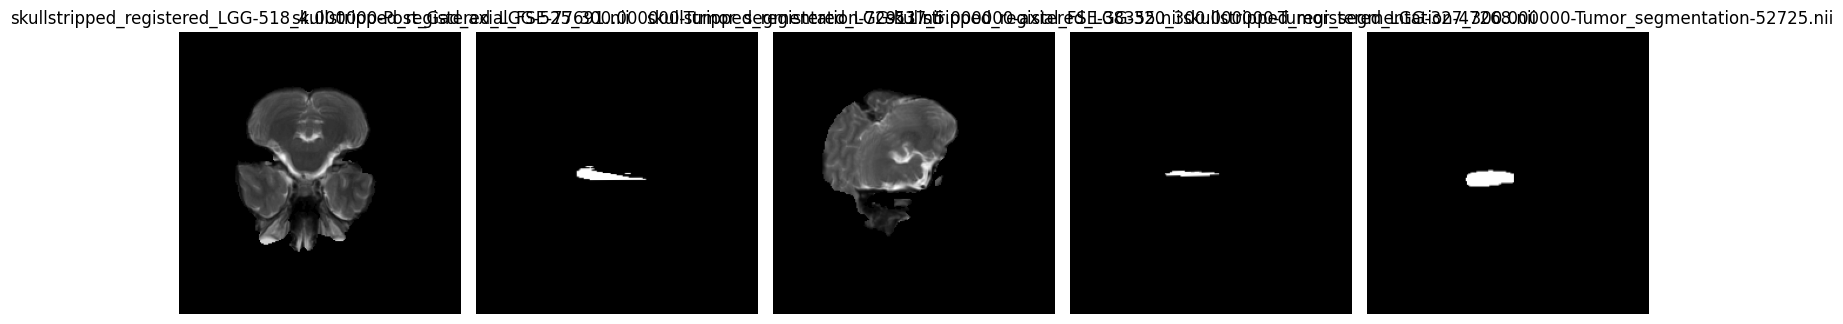

In [ ]:
import matplotlib.pyplot as plt
import os
import nibabel as nib
import random

skullstripped_nifti_dir = './drive/MyDrive/skullstripped_nifti'

nifti_files = [f for f in os.listdir(skullstripped_nifti_dir) if f.endswith('.nii.gz') and 't1' in f.lower()]

if not nifti_files:
    print(f"No NIfTI files containing 't1' found in directory: {skullstripped_nifti_dir}")
else:
    random_files = random.sample(nifti_files, min(5, len(nifti_files)))

    fig, axes = plt.subplots(1, len(random_files), figsize=(15, 5))

    for i, file_path in enumerate(random_files):
        try:
            img = nib.load(os.path.join(skullstripped_nifti_dir, file_path))
            img_data = img.get_fdata()

            middle_slice = img_data.shape[2] // 2
            image_slice = img_data[:, :, middle_slice]

            axes[i].imshow(image_slice, cmap='gray')
            axes[i].set_title(file_path)
            axes[i].axis('off')

        except Exception as e:
            print(f"Error displaying {file_path}: {e}")
            axes[i].set_title(f"Error loading {file_path}")
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()


---


## Classification

In [ ]:
!rm -rf ./skullstripped_nifti

In [ ]:
import shutil
from google.colab import drive
drive.mount('./drive')

!mkdir -p ./skullstripped_nifti
!cp -r ./drive/MyDrive/skullstripped_nifti/* ./skullstripped_nifti

Mounted at /content/drive


In [ ]:
import os

skullstripped_nifti_dir = './skullstripped_nifti'
num_files = len([f for f in os.listdir(skullstripped_nifti_dir) if os.path.isfile(os.path.join(skullstripped_nifti_dir, f))])
print(f"Number of files in {skullstripped_nifti_dir}: {num_files}")

Number of files in /content/skullstripped_nifti: 478


In [ ]:
!wget https://www.cancerimagingarchive.net/wp-content/uploads/TCIA_LGG_cases_159.xlsx

--2024-12-24 16:29:54--  https://www.cancerimagingarchive.net/wp-content/uploads/TCIA_LGG_cases_159.xlsx
Resolving www.cancerimagingarchive.net (www.cancerimagingarchive.net)... 144.30.169.13
Connecting to www.cancerimagingarchive.net (www.cancerimagingarchive.net)|144.30.169.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54212 (53K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘TCIA_LGG_cases_159.xlsx’

TCIA_LGG_cases_159. 100%[===================>]  52.94K  --.-KB/s    in 0.07s   

2024-12-24 16:29:54 (710 KB/s) - ‘TCIA_LGG_cases_159.xlsx’ saved [54212/54212]



In [ ]:
import pandas as pd
import os

excel_file = './TCIA_LGG_cases_159.xlsx'
df = pd.read_excel(excel_file)

file_label_map = {}
for index, row in df.iterrows():
    filename = row['Filename']
    label = row['1p/19q']
    #Handle potential missing values
    if isinstance(filename, str) and isinstance(label, str):
      file_label_map[filename] = label


# Directory containing the NIfTI files
nifti_dir = './skullstripped_nifti'

# Iterate through the NIfTI files
for filename in os.listdir(nifti_dir):
    if filename.endswith(".nii.gz") or filename.endswith(".nii"):
        base_name = filename.split("_")[2].split(".")[0] # Extract the base filename
        if base_name in file_label_map:
            label = file_label_map[base_name]
            print(f"File: {filename}, Label: {label}")
        else:
            print(f"File: {filename}, Label: Not found in Excel file")

File: skullstripped_registered_LGG-527_300.000000-Tumor_segmentation-14960.nii.gz, Label: d/d
File: skullstripped_registered_LGG-338_7.000000-axial_T1__GAD-97786.nii.gz, Label: n/n
File: skullstripped_registered_LGG-321_3.000000-AX._SPGRGAD-16844.nii.gz, Label: n/n
File: skullstripped_registered_LGG-659_300.000000-Tumor_segmentation-81781.nii.gz, Label: d/d
File: skullstripped_registered_LGG-572_6.000000-axial_FSE-78806.nii.gz, Label: d/d
File: skullstripped_registered_LGG-367_5.000000-Ax_Obl_FSE_gad-96126.nii.gz, Label: d/d
File: skullstripped_registered_LGG-576_5.000000-Post_Gad_AX._SPGR-96866.nii.gz, Label: d/d
File: skullstripped_registered_LGG-385_300.000000-Tumor_segmentation-26318.nii.gz, Label: d/d
File: skullstripped_registered_LGG-558_5.000000-AX._SPGR-88416.nii.gz, Label: n/n
File: skullstripped_registered_LGG-274_3.000000-AX_FSE-25738.nii.gz, Label: d/d
File: skullstripped_registered_LGG-375_3.000000-Post_Gad_axial_FSE-10577.nii.gz, Label: n/n
File: skullstripped_registered

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Make Train and Test Dataset

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import random

file_paths = []
labels = []

nifti_dir = './skullstripped_nifti'
for filename in os.listdir(nifti_dir):
    if filename.endswith(".nii.gz") or filename.endswith(".nii"):
        base_name = filename.split("_")[2].split(".")[0]
        if base_name in file_label_map:
            label = file_label_map[base_name]
            file_paths.append(os.path.join(nifti_dir, filename))
            labels.append(label)
        else:
            print(f"File: {filename}, Label: Not found in Excel file - skipping")


train_files, test_files, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

print("Train data examples:")
for i in range(min(5, len(train_files))):
    print(f"File: {train_files[i]}, Label: {train_labels[i]}")

print("\nTest data examples:")
for i in range(min(5, len(test_files))):
    print(f"File: {test_files[i]}, Label: {test_labels[i]}")


Train data examples:
File: /content/skullstripped_nifti/skullstripped_registered_LGG-325_6.000000-axial_T1__GAD-68672.nii.gz, Label: d/d
File: /content/skullstripped_nifti/skullstripped_registered_LGG-305_5.000000-Post_Gad_AX._SPGR-65331.nii.gz, Label: d/d
File: /content/skullstripped_nifti/skullstripped_registered_LGG-344_300.000000-Tumor_segmentation-64515.nii.gz, Label: d/d
File: /content/skullstripped_nifti/skullstripped_registered_LGG-525_5.000000-T1_FLASH_3D__AXIAL-73189.nii.gz, Label: d/d
File: /content/skullstripped_nifti/skullstripped_registered_LGG-216_300.000000-Tumor_segmentation-55770.nii.gz, Label: d/d

Test data examples:
File: /content/skullstripped_nifti/skullstripped_registered_LGG-506_4.000000-Post_Gad_axial_FSE-98202.nii.gz, Label: n/n
File: /content/skullstripped_nifti/skullstripped_registered_LGG-343_300.000000-Tumor_segmentation-95675.nii.gz, Label: n/n
File: /content/skullstripped_nifti/skullstripped_registered_LGG-626_300.000000-Tumor_segmentation-58733.nii.gz,

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import random

def display_sample_images(files, labels, num_images=5):

    filtered_files = [f for f in files if 'tumor_segmentation' not in os.path.basename(f).lower()]
    num_images = min(num_images, len(filtered_files))
    random_indices = random.sample(range(len(filtered_files)), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, index in enumerate(random_indices):
        try:
            img = nib.load(filtered_files[index])
            img_data = img.get_fdata()
            middle_slice = img_data.shape[2] // 2
            image_slice = img_data[:, :, middle_slice]

            name = os.path.basename(filtered_files[index]).split("_")[2].split(".")[0]
            axes[i].imshow(image_slice, cmap='gray')
            axes[i].set_title(f"Subject: {name}, Slice: {middle_slice}\nLabel: {labels[index]}")
            axes[i].axis('off')

        except Exception as e:
            print(f"Error displaying {filtered_files[index]}: {e}")
            axes[i].set_title(f"Error loading {os.path.basename(filtered_files[index])}")
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

Sample Train Images:


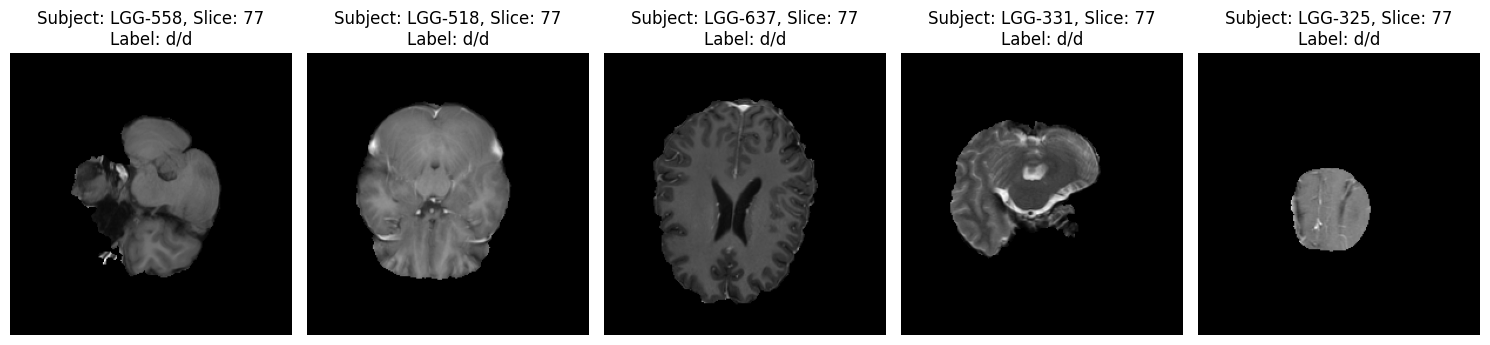


Sample Test Images:


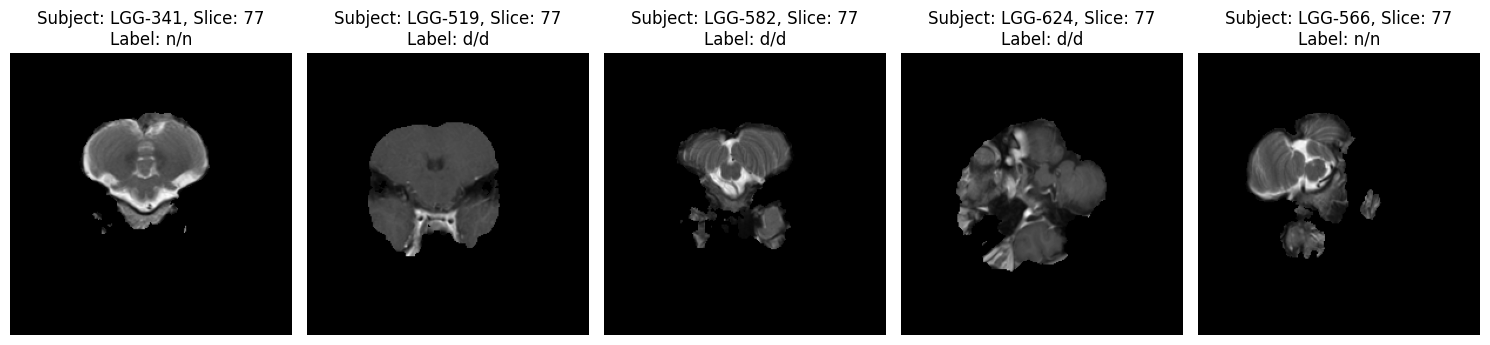

In [ ]:
print("Sample Train Images:")
display_sample_images(train_files, train_labels)

print("\nSample Test Images:")
display_sample_images(test_files, test_labels)

In [ ]:
import numpy as np

def remove_black_slices(nifti_file):
    """Removes black slices (slices with all pixel values equal to 0) from a NIfTI file.

    Args:
        nifti_file: Path to the NIfTI file.

    Returns:
        The path to the modified NIfTI file (or None if an error occurs).
    """
    try:
        img = nib.load(nifti_file)
        img_data = img.get_fdata()

        #Calculate sum of all pixels in each slice
        slice_sums = np.sum(img_data, axis=(0, 1))

        #Identify slices to keep (non-zero sum)
        slices_to_keep = np.where(slice_sums != 0)[0]

        #Extract those slices
        new_data = img_data[:, :, slices_to_keep]

        #Create a new NIfTI image with updated data
        new_affine = img.affine.copy()
        #Modify affine to reflect changes in z-axis dimension
        new_affine[2,3] = new_affine[2,3] + slices_to_keep[0] # Or appropriate adjustment


        new_img = nib.Nifti1Image(new_data, new_affine, header=img.header)
        #Update header's dimensions
        new_img.header.set_data_shape(new_data.shape)

        #Save new image with filename modified to show removal of slices
        new_nifti_file = nifti_file.replace('.nii.gz', '_no_black_slices.nii.gz').replace('skullstripped_nifti','final_data')
        nib.save(new_img, new_nifti_file)

        return new_nifti_file
    except Exception as e:
        print(f"Error processing {nifti_file}: {e}")
        return None

In [ ]:
!mkdir -p ./final_data

In [ ]:
skullstripped_nifti_dir = './skullstripped_nifti'

for file_list, label_list in [ (train_files, train_labels), (test_files, test_labels)]:
    for i, nifti_file in enumerate(file_list):
      if os.path.exists(nifti_file):
          new_nifti = remove_black_slices(nifti_file)
          if new_nifti:

              file_list[i] = new_nifti
      else:
        print(f"File not found: {nifti_file}")

In [ ]:
print(train_files)

['/content/final_data/skullstripped_registered_LGG-325_6.000000-axial_T1__GAD-68672_no_black_slices.nii.gz', '/content/final_data/skullstripped_registered_LGG-305_5.000000-Post_Gad_AX._SPGR-65331_no_black_slices.nii.gz', '/content/final_data/skullstripped_registered_LGG-344_300.000000-Tumor_segmentation-64515_no_black_slices.nii.gz', '/content/final_data/skullstripped_registered_LGG-525_5.000000-T1_FLASH_3D__AXIAL-73189_no_black_slices.nii.gz', '/content/final_data/skullstripped_registered_LGG-216_300.000000-Tumor_segmentation-55770_no_black_slices.nii.gz', '/content/final_data/skullstripped_registered_LGG-241_5.000000-Post_Gad_AX._SPGR-49061_no_black_slices.nii.gz', '/content/final_data/skullstripped_registered_LGG-573_300.000000-Tumor_segmentation-17962_no_black_slices.nii.gz', '/content/final_data/skullstripped_registered_LGG-589_5.000000-Post_Gad_AX._SPGR-08724_no_black_slices.nii.gz', '/content/final_data/skullstripped_registered_LGG-565_300.000000-Tumor_segmentation-60277_no_blac

Sample Train Images:


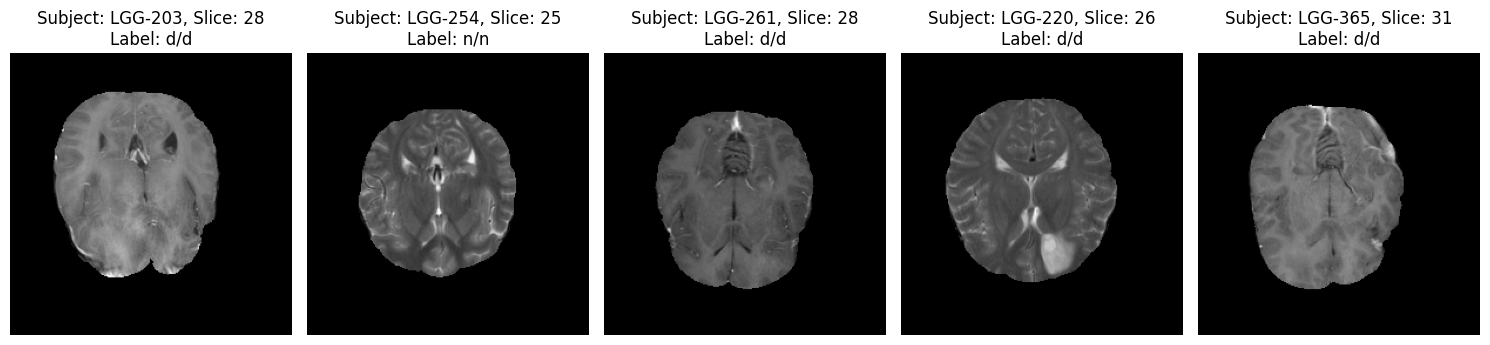


Sample Test Images:


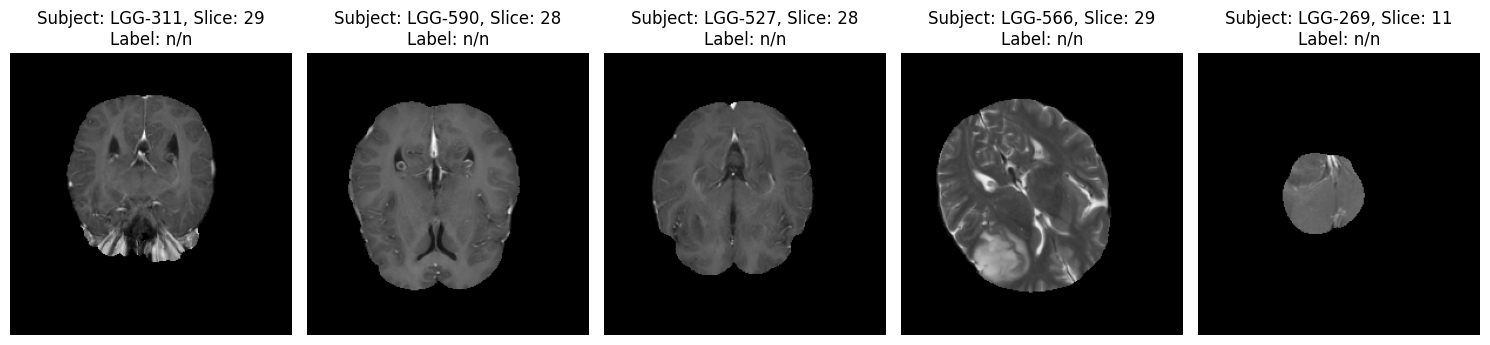

In [ ]:
print("Sample Train Images:")
display_sample_images(train_files, train_labels)

print("\nSample Test Images:")
display_sample_images(test_files, test_labels)

In [ ]:
def show_all_slices(subject_name, nifti_dir='./final_data'):
    for filename in os.listdir(nifti_dir):
        if filename.endswith(".nii.gz") and subject_name in filename and 'tumor' not in filename.lower():
            nifti_file = os.path.join(nifti_dir, filename)
            break
    try:
        img = nib.load(nifti_file)
        img_data = img.get_fdata()
        num_slices = img_data.shape[2]

        fig, axes = plt.subplots(int(num_slices**0.5), int(num_slices**0.5), figsize=(15, 15))
        fig.suptitle(f"Slices of Subject: {subject_name}")

        for i in range(num_slices):
            row = i // int(num_slices**0.5)
            col = i % int(num_slices**0.5)

            axes[row, col].imshow(img_data[:, :, i], cmap='gray')
            axes[row, col].set_title(f"Slice {i + 1}")
            axes[row, col].axis('off')

        for i in range(num_slices, int(num_slices**0.5) * int(num_slices**0.5)):
            row = i // int(num_slices**0.5)
            col = i % int(num_slices**0.5)
            axes[row, col].axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {nifti_file}: {e}")
        return None

Error processing /content/final_data/skullstripped_registered_LGG-341_2.000000-axial_FSE-27966_no_black_slices.nii.gz: index 7 is out of bounds for axis 0 with size 7


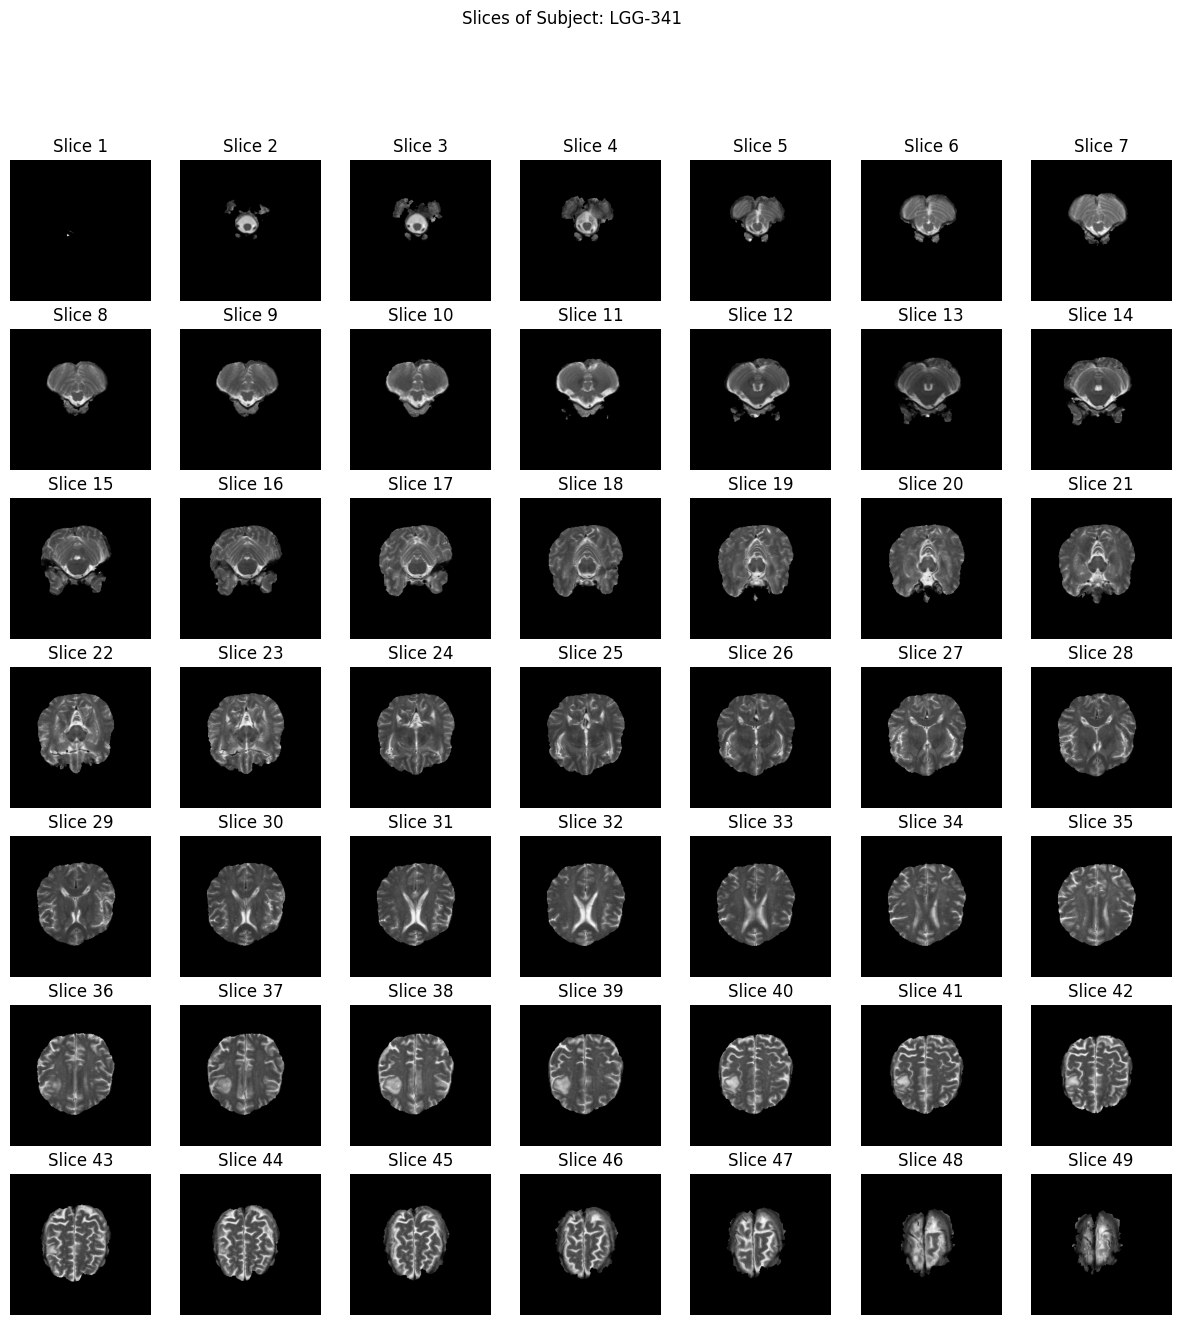

In [ ]:
show_all_slices('LGG-341')

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import random

excel_file = './TCIA_LGG_cases_159.xlsx'
df = pd.read_excel(excel_file)

file_label_map = {}
for index, row in df.iterrows():
    filename = row['Filename']
    label = row['1p/19q']
    if isinstance(filename, str) and isinstance(label, str):
      file_label_map[filename] = label

file_paths = []
labels = []

nifti_dir = './final_data'
for filename in os.listdir(nifti_dir):
    if filename.endswith(".nii.gz") and 'tumor' not in filename.lower():
        base_name = filename.split("_")[2].split(".")[0]
        if base_name in file_label_map:
            label = file_label_map[base_name]
            file_paths.append(os.path.join(nifti_dir, filename))
            labels.append(label)
        else:
            print(f"File: {filename}, Label: Not found in Excel file - skipping")


train_files, test_files, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

print("Train data examples:")
for i in range(min(5, len(train_files))):
    print(f"File: {train_files[i]}, Label: {train_labels[i]}")

print("\nTest data examples:")
for i in range(min(5, len(test_files))):
    print(f"File: {test_files[i]}, Label: {test_labels[i]}")

Train data examples:
File: /content/final_data/skullstripped_registered_LGG-600_5.000000-Post_Gad_axial_FSE-52785_no_black_slices.nii.gz, Label: d/d
File: /content/final_data/skullstripped_registered_LGG-269_5.000000-axial_T1__GAD-75667_no_black_slices.nii.gz, Label: d/d
File: /content/final_data/skullstripped_registered_LGG-570_4.000000-axial_FSE-12947_no_black_slices.nii.gz, Label: d/d
File: /content/final_data/skullstripped_registered_LGG-659_4.000000-GAD_Ax_T2-15076_no_black_slices.nii.gz, Label: d/d
File: /content/final_data/skullstripped_registered_LGG-326_2.000000-Ax_Obl_FSE-49264_no_black_slices.nii.gz, Label: d/d

Test data examples:
File: /content/final_data/skullstripped_registered_LGG-391_3.000000-AX_FSE-23654_no_black_slices.nii.gz, Label: n/n
File: /content/final_data/skullstripped_registered_LGG-333_2.000000-axial_FSE-55241_no_black_slices.nii.gz, Label: d/d
File: /content/final_data/skullstripped_registered_LGG-334_9.000000-axial_T1_SE_GAD-00842_no_black_slices.nii.gz, 

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
import os
import nibabel as nib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def create_model(input_shape):
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv3D(32, kernel_size=(3, 3, 3), activation="relu"),
            layers.MaxPool3D(pool_size=(2, 2, 2)),
            layers.Conv3D(64, kernel_size=(3, 3, 3), activation="relu"),
            layers.MaxPool3D(pool_size=(2, 2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(1, activation="sigmoid"),
        ]
    )
    return model

In [ ]:
def load_and_preprocess_data(file_paths, labels):
  images = []
  for file_path in file_paths:
      try:
          img = nib.load(file_path)
          img_data = img.get_fdata()
          img_data = (img_data - img_data.min()) / (img_data.max() - img_data.min())
          images.append(img_data)

      except Exception as e:
          print(f"Error loading {file_path}: {e}")

  # max_shape = tuple(max(image.shape[i] for image in images) for i in range(3))

  # padded_images = []
  # for img in images:
  #     pad_width = [(0, max_shape[0]-img.shape[0]), (0,max_shape[1]-img.shape[1]),(0,max_shape[2]-img.shape[2])]
  #     padded_image = np.pad(img, pad_width=pad_width, mode='constant',constant_values=0)
  #     padded_images.append(padded_image)

  numeric_labels = [1 if l.strip() == "d/d" else 0 for l in labels]

  return images, np.array(numeric_labels)


In [ ]:
X_train, y_train = load_and_preprocess_data(train_files, train_labels)
X_test, y_test = load_and_preprocess_data(test_files, test_labels)

In [ ]:
import numpy as np

# Example padding function
def pad_array(array, target_shape):
    pad_width = [(0, max(0, target - current)) for current, target in zip(array.shape, target_shape)]
    return np.pad(array, pad_width, mode='constant')

# Target shape
target_shape = (64, 240, 240)

# Pad elements to the target shape
X_test_padded = [pad_array(x, target_shape) for x in X_test]

# Convert to NumPy array
X_test_padded = np.array(X_test_padded)


In [ ]:
input_shape = X_train.shape[1:]
model = create_model(input_shape)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=2)

In [ ]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)